<a href="https://colab.research.google.com/github/naoya1110/DL_Lecture_202107/blob/main/Chapter02_Numpy_Matplotlib_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 02: Numpy, Matplotlib & Pandas

Pythonはディープラーニングだけではなく，科学計算や分析に適したプログラミング言語として知られています。その理由は，高度な数値計算のための[Numpy（ナムパイ）](https://numpy.org/) やデータを可視化するための[Matplotlib（マットプロットリブ）](https://matplotlib.org/)， データ分析のための[Pandas（パンダス）](https://pandas.pydata.org/)といった便利なパッケージ（ライブラリ）が豊富に存在するためだと考えられます。ここではこれらのパッケージを使ってデータを可視化したり解析する方法を学びましょう。

## ライブラリのインポート


Pythonでパッケージをインポートするときは，```import パッケージ名```と書きます。パッケージの名前が長い場合は，```import パッケージ名 as xx```として省略することがあります。省略語は何でも構いませんが，ほとんどの場合でnumpyはnp，matplotlibはplt，pandasはpdと省略されます。

また次の例では，matplotlibはmatplotlib.pyplotとすることで，matplotlibパッケージの中から，データプロットに必要なpyplotモジュールのみをインポートしています。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Numpy配列の作り方

Numpyを使って0から4まで１ずつ増加する配列を作成してみましょう。

In [2]:
np.arange(5)

array([0, 1, 2, 3, 4])

増分を1ではなく，任意の大きさに指定することもできます。たとえば0から10まで2ずつ増加する配列を作成するには次のように書きます。

In [3]:
np.arange(0,11,2)

array([ 0,  2,  4,  6,  8, 10])

増分を指定するのではなく，何分割するかを指定して配列を作ることもできます。0から1を等間隔で11個に分割するには次のように書きます。

In [4]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## Matplotlibを使ったデータプロット
matplotlibを使ってy=sin(x)のグラフを表示してみましょう。

### データの作成
はじめにnumpyを使ってxの配列とy=sin(x)の配列を作成します。

In [5]:
# xの配列を適当に作成。ちなみにnp.pi = 3.141592.....
x = np.arange(0, 2*np.pi, 0.2)

# sin(x)を計算
y = np.sin(x)

# それぞれの配列を表示して確認
print("x =", x)
print("y =",y)

x = [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2]
y = [ 0.          0.19866933  0.38941834  0.56464247  0.71735609  0.84147098
  0.93203909  0.98544973  0.9995736   0.97384763  0.90929743  0.8084964
  0.67546318  0.51550137  0.33498815  0.14112001 -0.05837414 -0.2555411
 -0.44252044 -0.61185789 -0.7568025  -0.87157577 -0.95160207 -0.993691
 -0.99616461 -0.95892427 -0.88345466 -0.77276449 -0.63126664 -0.46460218
 -0.2794155  -0.0830894 ]


### プロット

すでに作成したxとyを```plt.plot()```を使ってグラフにプロットします。超簡単！

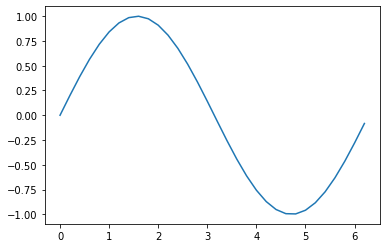

In [6]:
plt.plot(x, y)

matplotlibのグラフはいろいろとカスタマイズ可能です。多すぎてキリがないので，全部一通り覚えるのではなく，必要になったときにネットを検索して探すと良いと思います。

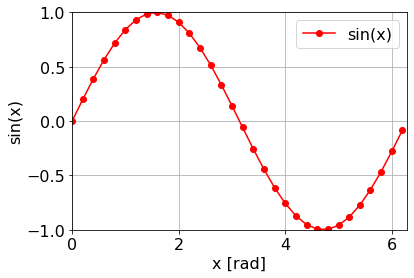

In [7]:
# グラフの用紙サイズを指定（単位はインチ）
plt.figure(figsize=(6,4))

# フォントのサイズを指定
plt.rcParams["font.size"]=16

# マーカーの種類，色等を指定
plt.plot(x, y, marker="o", color="red", label="sin(x)")

# x軸，y軸の表示範囲を指定
plt.xlim(0, 2*np.pi)
plt.ylim(-1, 1)

# x軸，y軸のラベル
plt.xlabel("x [rad]")
plt.ylabel("sin(x)")

# グリッド線を表示
plt.grid(True)

# 凡例を表示
plt.legend()

# 画像をpdfファイルで保存
plt.savefig("figure_sin.pdf")

## Pandasを使ったデータの読み込み

### Googleドライブのマウント

googleドライブ内にあるファイルをpandasで読み出します。

まずは，以下の手順で自分のGoogleドライブにアクセスできるようにします。

1.   以下のセルを実行します。
1.   ```Go to this URL in browser:```の後に表示されるURLをクリックして，自分のアカウントにログインします。
1.   アクセスのリクエストを許可し，表示されるコードをコピーします。
1.   ```Enter your authorization code:```の後の空欄にコピーしたコードを貼り付け，エンターを押します。

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


```Mounted at /content/drive```と表示されればGoogleドライブがマウントでき，ファイルにアクセスできるようになっています。

### データの読み込み

``DL_Lecture_202107``フォルダ内にある`xy_data.xlsx`のパスを以下のように指定します。

In [9]:
path = "/content/drive/My Drive/DL_Lecture_202107/xy_data.xlsx"

指定したパスのファイルをpandasで読み込むには以下のように書きます。pandasを使ってデータを読み込むと，DataFrameという形式でデータが取り扱われ，後々の処理がラクになります。

In [10]:
df = pd.read_excel(path)

読み込んだデータを表示して確認します。```df```だけならすべてのデータが表示されます。```df.head```なら最初の5行分だけ，```df.tail()```なら最後の5行分だけを表示することができます。

In [11]:
df.head()

,Unnamed: 0,x,y1,y2
0,0,-10.0,-2.183307,5.738848
1,1,-9.5,-2.110337,5.254115
2,2,-9.0,-1.767745,3.630710
3,3,-8.5,-1.758005,3.747354
4,4,-8.0,-1.618263,2.441208


### 読み込んだデータのプロット

matplotlibを使って`x`と`y1`の関係をプロットします。

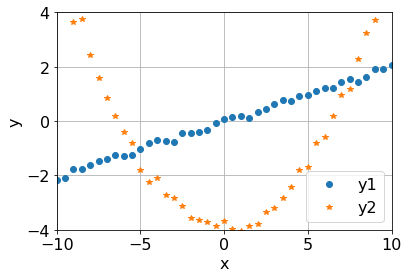

In [12]:
plt.plot(df["x"], df["y1"], marker="o", lw=0, label="y1")     # xとy1をプロット，lw=0として線を表示しない
plt.plot(df["x"], df["y2"], marker="*", lw=0, label="y2")     # xとy2をプロット，lw=0として線を表示しない

plt.xlabel("x")          # x軸のラベル
plt.ylabel("y")          # y軸のラベル
plt.xlim(-10, 10)      # x軸の範囲を指定
plt.ylim(-4, 4)         # y軸の範囲を指定
plt.grid(True)          # グリッド線を表示
plt.legend()             # 凡例を表示

### Numpyを使った近似直線（データのフィッティング）

`x`と`y1`のデータに対して `y1 = a*x + b `の近似曲線を求めます。

In [13]:
x = df["x"]
y1 = df["y1"]

# xとyの関係を直線(一次関数)でフィッティングするために
# np.polyfit（ｘ，ｙ，１）を使う
# 最後の1は近似曲線の次数を指定しており１次式での近似になる
# 2以上にすれば曲線としてフィッティングされる
a, b = np.polyfit(x, y1, 1)

# 求まった係数aとbを確認
print("a=", a)
print("b=", b)

a= 0.2035842002956472
b= -0.022824683578311283


上のセルで`a`, `b`を求めたので，次に近似直線 `y1_fit` を求めます。

In [14]:
y1_fit = a*x + b

### 実験データと近似曲線のプロット
実験データと近似直線をプロットします。

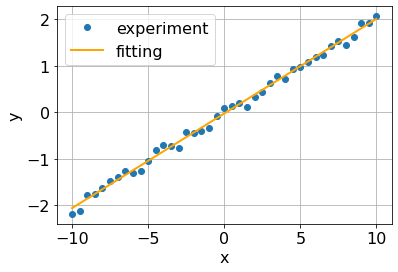

In [15]:
# 実験データをプロット
plt.plot(x, y1, marker="o", lw=0, label="experiment")

# 近似直線をプロット
plt.plot(x, y1_fit, color="orange", lw=2, label="fitting")

#x軸とy軸のラベルを設定
plt.xlabel("x")
plt.ylabel("y")

#凡例を表示
plt.legend()

# グリッド線を表示
plt.grid(True)

同様に`x`と`y2`のデータに対するフィッティングは以下のようになります。

In [16]:
x = df["x"]
y2 = df["y2"]

a1, a2, b = np.polyfit(x, y2, 2)

print("a1=", a1)
print("a2=", a2)
print("b=", b)

a1= 0.09839142947366829
a2= -0.006506625485706817
b= -3.9502321514086387


In [17]:
y2_fit = a1*x**2 + a2*x + b

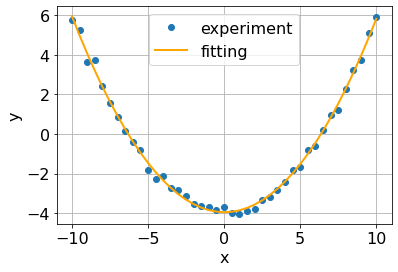

In [18]:
plt.plot(x, y2, marker="o", lw=0, label="experiment")
plt.plot(x, y2_fit, color="orange", lw=2, label="fitting")

plt.xlabel("x")
plt.ylabel("y")

plt.legend()

plt.grid(True)